## Data Processing

In [ ]:
# !pip install tabulate

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import statsmodels.api as sm 
from statsmodels.formula.api import glm
%matplotlib inline

In [2]:
df=pd.read_csv('resume.csv')

In [3]:
df

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,1344,Boston,finance_insurance_real_estate,secretary,0.0,0,private,1,0,0,...,0,0,1,1,1,0,0,1,0,low
4866,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,6,1,0,0,0,0,0,low
4867,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,8,1,0,1,0,0,1,high
4868,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,2,1,0,1,1,0,1,high


In [5]:
df.reset_index()

,index,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,...,0,1,22,1,0,0,0,0,1,high
1,7,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,...,0,0,21,1,1,1,0,1,1,high
2,10,387,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,...,0,0,8,1,1,1,0,1,1,high
3,11,387,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,...,0,1,8,1,0,0,0,0,1,high
4,23,391,Chicago,other_service,secretary,1.0,0,nonprofit,1,0,...,0,0,7,1,0,0,0,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,4821,78,Boston,wholesale_and_retail_trade,retail_sales,0.0,0,private,1,0,...,0,1,6,1,0,0,0,0,0,low
1498,4858,381,Boston,wholesale_and_retail_trade,retail_sales,0.0,0,private,1,0,...,0,1,2,1,0,1,1,0,1,high
1499,4859,381,Boston,wholesale_and_retail_trade,retail_sales,0.0,0,private,1,0,...,0,1,6,1,0,0,0,0,0,low
1500,4860,381,Boston,wholesale_and_retail_trade,retail_sales,0.0,0,private,1,0,...,0,1,8,1,0,1,0,0,1,high


In [6]:
#Make a list of all the unique names
unique_names = df['firstname'].unique()

In [7]:
#Print all names to make categories
unique_names

array(['Carrie', 'Kenya', 'Aisha', 'Allison', 'Keisha', 'Kristen',
       'Lakisha', 'Jill', 'Meredith', 'Ebony', 'Jay', 'Laurie', 'Tyrone',
       'Anne', 'Latonya', 'Jamal', 'Matthew', 'Neil', 'Leroy', 'Todd',
       'Brett', 'Darnell', 'Jermaine', 'Latoya', 'Tamika', 'Geoffrey',
       'Rasheed', 'Brad', 'Sarah', 'Tanisha', 'Kareem', 'Emily', 'Greg',
       'Hakim', 'Brendan', 'Tremayne'], dtype=object)

In [8]:
#Make name categories
white_male_names=[ 'Matthew', 'Neil', 'Leroy', 'Todd','Brett','Geoffrey','Brad','Greg','Brendan','Jay',]
white_female_names=['Carrie','Allison','Kristen','Anne', 'Sarah', 'Emily','Laurie','Jill', 'Meredith', 'Anne']
black_male_names=['Jamal','Darnell', 'Jermaine','Rasheed','Kareem','Hakim','Tremayne','Tyrone', ]
black_female_names=['Kenya', 'Aisha','Keisha','Latonya','Latoya', 'Tamika','Tanisha','Ebony','Lakisha' ]

In [ ]:
# #Replace names with their respective category

# df['firstname']=df['firstname'].replace(white_male_names,1)
# df['firstname']=df['firstname'].replace(white_female_names,2)
# df['firstname']=df['firstname'].replace(black_male_names,3)
# df['firstname']=df['firstname'].replace(black_female_names,4)

In [9]:
#Replace names with their respective category
df['received_callback']=df['received_callback'].replace(0,2)
df['firstname']=df['firstname'].replace(white_male_names,1)
df['firstname']=df['firstname'].replace(white_female_names,1)
df['firstname']=df['firstname'].replace(black_male_names,2)
df['firstname']=df['firstname'].replace(black_female_names,2)

In [ ]:
#Check to make sure we did not miss any names
df['firstname'].unique()

# Chi-square test of independence.

In [10]:
all_col = df.columns.values
print(all_col)

['job_ad_id' 'job_city' 'job_industry' 'job_type' 'job_fed_contractor'
 'job_equal_opp_employer' 'job_ownership' 'job_req_any'
 'job_req_communication' 'job_req_education' 'job_req_min_experience'
 'job_req_computer' 'job_req_organization' 'job_req_school'
 'received_callback' 'firstname' 'race' 'gender' 'years_college'
 'college_degree' 'honors' 'worked_during_school' 'years_experience'
 'computer_skills' 'special_skills' 'volunteer' 'military'
 'employment_holes' 'has_email_address' 'resume_quality']


In [11]:
Dep_variables = ['received_callback']
excluded_columns = {'received_callback'}
Indep_variables = [col for col in all_col if col not in excluded_columns]

In [12]:
def Chi_square_table_test(df,v1,v2):
    contigency= pd.crosstab(df[v1], df[v2])
    contigency_pct= pd.crosstab(df[v1], df[v2],normalize='index') 
    print(tabulate(contigency, headers='keys', tablefmt='psql'))
    print(tabulate(contigency_pct, headers='keys', tablefmt='psql'))
    c, p, dof, expected = chi2_contingency(contigency) 
    print(f"The p-value (Chi-square test of independenc: {v1} and {v2} ):\n{p}")

In [13]:
for i in Indep_variables:
    for j in Dep_variables:
        print(j)
        Chi_square_table_test(df,i,j)
        print("\n")
    print("------------------------------------------------------------------------------------------------------------------------------------------------------")    


received_callback
+-------------+-----+-----+
|   job_ad_id |   1 |   2 |
|-------------+-----+-----|
|           1 |   0 |   4 |
|           2 |   0 |   4 |
|           3 |   0 |   4 |
|           4 |   0 |   4 |
|           6 |   0 |   4 |
|           8 |   0 |   4 |
|          11 |   0 |   4 |
|          12 |   0 |   4 |
|          13 |   0 |   4 |
|          14 |   0 |   4 |
|          20 |   0 |   4 |
|          21 |   0 |   4 |
|          23 |   0 |   4 |
|          25 |   0 |   4 |
|          31 |   0 |   4 |
|          32 |   0 |   4 |
|          33 |   0 |   4 |
|          36 |   0 |   4 |
|          38 |   0 |   4 |
|          39 |   0 |   4 |
|          40 |   2 |   2 |
|          45 |   0 |   4 |
|          46 |   0 |   4 |
|          50 |   0 |   4 |
|          57 |   0 |   4 |
|          60 |   0 |   4 |
|          61 |   0 |   4 |
|          62 |   0 |   4 |
|          63 |   0 |   4 |
|          64 |   0 |   4 |
|          66 |   0 |   4 |
|          69 |   0 |   4 |
| 

In [14]:
# Dictionary to store p-values
p_values = {}

# Loop through each independent variable
for i in Indep_variables:
    p_values[i] = []  # Initialize an empty list for storing p-values

    for j in Dep_variables:
        # Create contingency table
        contingency = pd.crosstab(df[i], df[j])
        
        # Perform Chi-square test
        _, p, _, _ = chi2_contingency(contingency)
        
        # Store p-value
        p_values[i].append(p)

# Convert dictionary to DataFrame
p_values_df = pd.DataFrame.from_dict(p_values, orient='index', columns=Dep_variables)

# Display the resulting DataFrame
print(p_values_df)

                        received_callback
job_ad_id                    4.164116e-25
job_city                     2.196101e-02
job_industry                 9.183932e-01
job_type                     8.146139e-02
job_fed_contractor           7.711933e-01
job_equal_opp_employer       8.653284e-01
job_ownership                4.747904e-01
job_req_any                  1.000000e+00
job_req_communication        7.949076e-01
job_req_education            3.375053e-02
job_req_min_experience       7.556355e-01
job_req_computer             6.377646e-01
job_req_organization         1.046254e-01
job_req_school               1.063992e-01
firstname                    4.119113e-02
race                         3.754522e-02
gender                       9.445849e-01
years_college                5.178491e-01
college_degree               7.849385e-01
honors                       2.076442e-01
worked_during_school         2.141215e-01
years_experience             5.767472e-01
computer_skills              1.266

Choose 10 variables to use for analysis


FEATURES:

resume_quality
employment_holes
years_experience
worked_during_school
college_degree
years_college
firstname
computer_skills
special_skills



LABELS:

received_callback

In [15]:
df.columns

Index(['job_ad_id', 'job_city', 'job_industry', 'job_type',
       'job_fed_contractor', 'job_equal_opp_employer', 'job_ownership',
       'job_req_any', 'job_req_communication', 'job_req_education',
       'job_req_min_experience', 'job_req_computer', 'job_req_organization',
       'job_req_school', 'received_callback', 'firstname', 'race', 'gender',
       'years_college', 'college_degree', 'honors', 'worked_during_school',
       'years_experience', 'computer_skills', 'special_skills', 'volunteer',
       'military', 'employment_holes', 'has_email_address', 'resume_quality'],
      dtype='object')

In [16]:
df = df.drop(labels=['job_ad_id', 'job_city', 'job_industry', 'job_type',
       'job_fed_contractor', 'job_equal_opp_employer', 'job_ownership',
       'job_req_any', 'job_req_communication', 'job_req_education',
       'job_req_min_experience', 'job_req_computer', 'job_req_organization',
       'job_req_school', 'race', 'gender','volunteer',
       'military','honors','has_email_address'], axis = 1)

In [17]:
df

,received_callback,firstname,years_college,college_degree,worked_during_school,years_experience,computer_skills,special_skills,employment_holes,resume_quality
4,2,1,3,0,1,22,1,0,0,high
7,2,2,3,0,0,21,1,1,1,high
10,2,2,4,1,0,8,1,1,1,high
11,2,1,4,1,1,8,1,0,0,high
23,2,1,4,1,0,7,1,0,1,low
...,...,...,...,...,...,...,...,...,...,...
4821,2,2,4,1,1,6,1,0,0,low
4858,2,2,4,1,1,2,1,0,0,high
4859,1,2,4,1,1,6,1,0,0,low
4860,2,1,4,1,1,8,1,0,0,high


In [18]:
df.columns.values

array(['received_callback', 'firstname', 'years_college',
       'college_degree', 'worked_during_school', 'years_experience',
       'computer_skills', 'special_skills', 'employment_holes',
       'resume_quality'], dtype=object)

# Logistic Reg

In [19]:
# Define model formula :https://www.statsmodels.org/dev/examples/notebooks/generated/glm_weights.html
formula = 'C(received_callback) ~ C(firstname)+ C(college_degree)+ C(worked_during_school) + C(computer_skills) + C(special_skills) + C(employment_holes) + C(resume_quality)+years_college + years_experience'
family_GLM = sm.families.Binomial()

model_GLM = glm(formula = formula, data = df, family = family_GLM ).fit()
print(model_GLM.summary())

                                   Generalized Linear Model Regression Results                                    
Dep. Variable:     ['C(received_callback)[1]', 'C(received_callback)[2]']   No. Observations:                 1502
Model:                                                                GLM   Df Residuals:                     1492
Model Family:                                                    Binomial   Df Model:                            9
Link Function:                                                      Logit   Scale:                          1.0000
Method:                                                              IRLS   Log-Likelihood:                -356.54
Date:                                                    Wed, 07 May 2025   Deviance:                       713.07
Time:                                                            12:54:53   Pearson chi2:                 1.51e+03
No. Iterations:                                                         6   Pseu

In [20]:
params = model_GLM.params
conf = model_GLM.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['2.5%', '97.2%', 'Odds Ratio']
print(np.exp(conf))

                                  2.5%     97.2%  Odds Ratio
Intercept                     0.017872  0.339573    0.077904
C(firstname)[T.2]             0.426855  0.991049    0.650411
C(college_degree)[T.1]        0.540042  3.655079    1.404954
C(worked_during_school)[T.1]  0.615876  1.787107    1.049112
C(computer_skills)[T.1]       0.425807  1.185747    0.710563
C(special_skills)[T.1]        1.159061  2.822320    1.808657
C(employment_holes)[T.1]      0.824146  2.147438    1.330339
C(resume_quality)[T.low]      0.631400  1.616807    1.010372
years_college                 0.554240  1.494676    0.910170
years_experience              0.969985  1.049621    1.009018


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
X= df[['firstname', 'years_college',
       'college_degree', 'worked_during_school', 'years_experience',
       'computer_skills', 'special_skills', 'employment_holes','resume_quality']]

y = df[["received_callback"]]-1


In [22]:
X_encoded = X.drop(columns=["years_college","years_experience"])
X_encoded = pd.get_dummies(X_encoded)
X_encoded[["years_college","years_experience"]] = X[["years_college","years_experience"]]
X_encoded

,firstname,college_degree,worked_during_school,computer_skills,special_skills,employment_holes,resume_quality_high,resume_quality_low,years_college,years_experience
4,1,0,1,1,0,0,1,0,3,22
7,2,0,0,1,1,1,1,0,3,21
10,2,1,0,1,1,1,1,0,4,8
11,1,1,1,1,0,0,1,0,4,8
23,1,1,0,1,0,1,0,1,4,7
...,...,...,...,...,...,...,...,...,...,...
4821,2,1,1,1,0,0,0,1,4,6
4858,2,1,1,1,0,0,1,0,4,2
4859,2,1,1,1,0,0,0,1,4,6
4860,1,1,1,1,0,0,1,0,4,8


In [23]:
tree  = DecisionTreeClassifier(random_state=42)
tree.fit(X_encoded, y)

DecisionTreeClassifier(random_state=42)

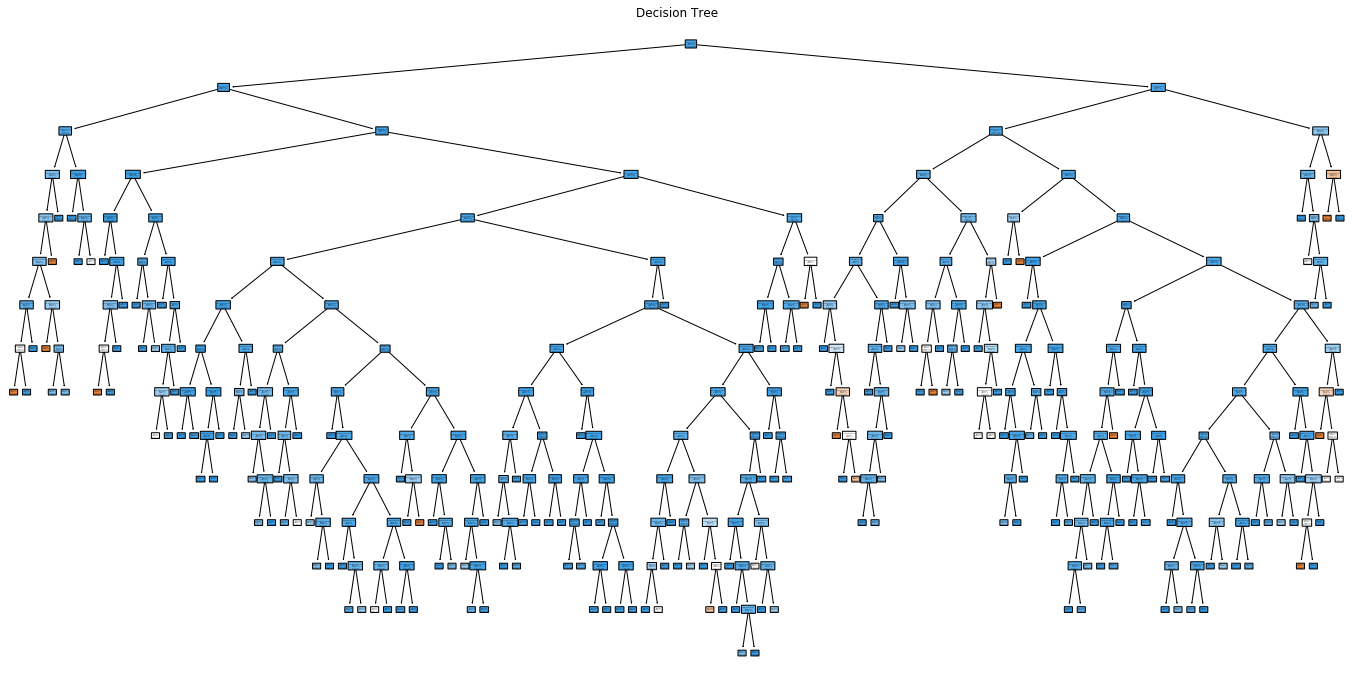

In [24]:
# Visualize the decision tree
plt.figure(figsize=(24, 12))
plot_tree(tree, 
          feature_names=X_encoded.columns.values, 
          class_names=y.columns.values[0],
          filled=True, 
          rounded=True)
plt.title("Decision Tree")
plt.show()

In [25]:
# Create a DataFrame of feature importances
importance_df = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Importance": tree.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importance_df)

                Feature  Importance
9      years_experience    0.381818
0             firstname    0.170323
5      employment_holes    0.108358
2  worked_during_school    0.094986
7    resume_quality_low    0.086782
3       computer_skills    0.059767
8         years_college    0.035304
6   resume_quality_high    0.025621
1        college_degree    0.019880
4        special_skills    0.017162


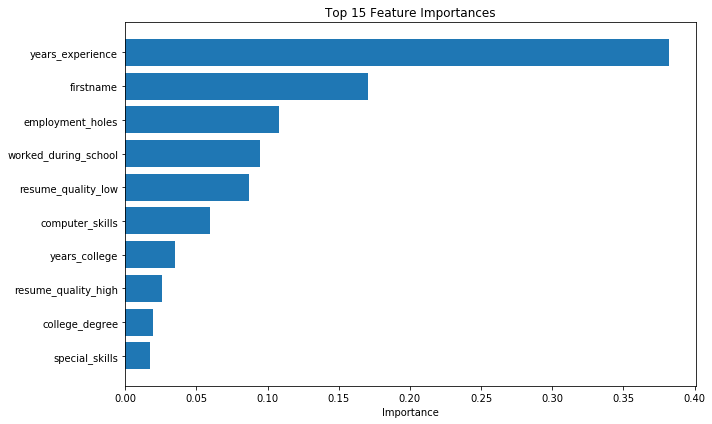

In [26]:
# Plot top 15 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"][:15][::-1], importance_df["Importance"][:15][::-1])
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()

--------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

In [ ]:
df['resume_quality']=df['resume_quality'].replace('high',3)
df['resume_quality']=df['resume_quality'].replace('low',2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X = df[['received_callback', 'firstname', 'years_college',
       'college_degree', 'worked_during_school', 'years_experience',
       'computer_skills', 'special_skills', 'employment_holes','resume_quality']]

y = df[["received_callback"]]

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X, y)
tree.predict(X)


In [ ]:
from sklearn.tree import export_graphviz
graph_tree=export_graphviz(
    tree,
    out_file=("resume_tree.dot"),
    #feature_names=np.array(['received_callback', 'firstname', 'years_college',
       #'college_degree', 'worked_during_school', 'years_experience',
       #'computer_skills', 'special_skills', 'employment_holes','resume_quality']),
    #class_names=np.array(df.columns[0]),
    rounded=True,
    filled=True
)


In [ ]:
! dot -Tpng  resume_tree.dot -o resume_tree.png

# Graph Distributions

In [6]:
#Reread in data because we are using variables that have been dropped
df2=pd.read_csv('resume.csv')

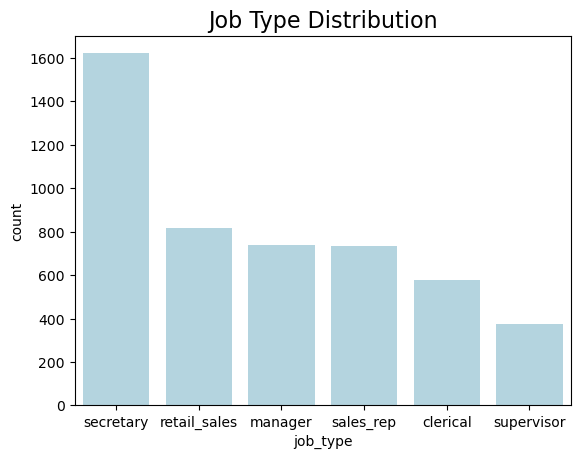

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
data = df2

sns.countplot(data, x="job_type",color="lightblue",order=["secretary","retail_sales","manager","sales_rep","clerical","supervisor"])
plt.title("Job Type Distribution", fontsize=16)
plt.show()

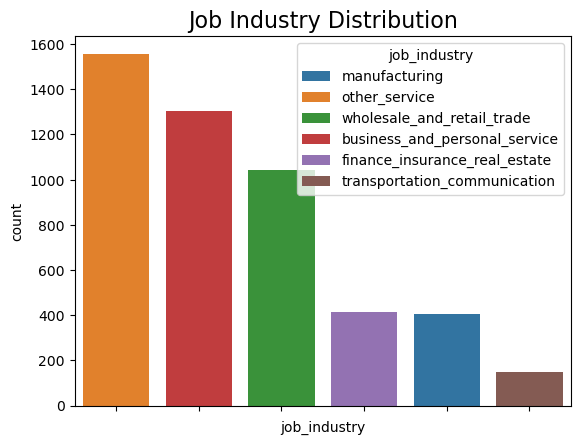

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt
data = df2



sns.countplot(data, x="job_industry",hue="job_industry",order=["other_service","business_and_personal_service","wholesale_and_retail_trade","finance_insurance_real_estate","manufacturing","transportation_communication"],legend=True).set(xticklabels=[])
plt.title("Job Industry Distribution", fontsize=16)
plt.show()



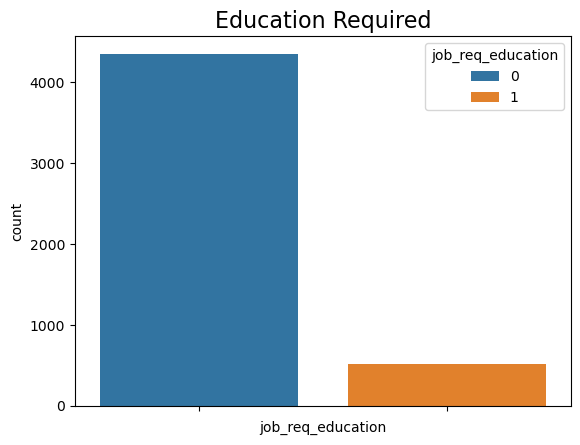

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt
data = df2



sns.countplot(data, x="job_req_education",hue="job_req_education",legend=True).set(xticklabels=[])
plt.title("Education Required", fontsize=16)
plt.show()



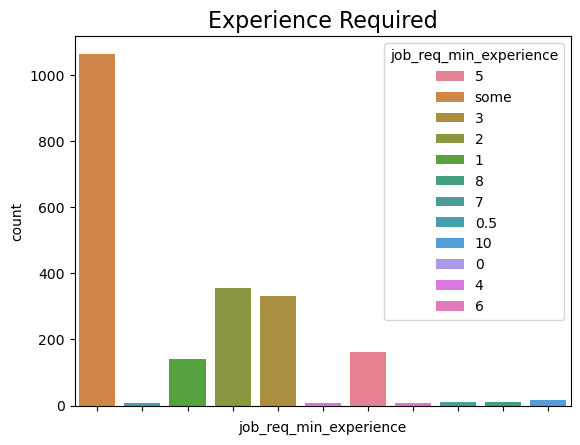

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt
data = df2



sns.countplot(data, x="job_req_min_experience",hue="job_req_min_experience",legend=True, order=['some',0.5,1,2,3,4,5,6,7,8,10]).set(xticklabels=[])
plt.title("Experience Required", fontsize=16)
plt.show()

 